# Analiza repozytoriów 

## Wstęp i motywacja
Podczas tworzenia tego portfolio pojawiło się pytanie, co powinno się w nim znaleźć. Aby na nie odpowiedzieć, zostały przeanalizowane repozytoria serwisu gtihub, dla hasła 'data science portfolio'. Do pobrania danych została wykorzystana biblioteka [pygithub](https://pygithub.readthedocs.io/). Pobrano 4423 pliki należące do 247 użytkowników. Odpowiedzi opracowano na podstawie 2146 będących analizami.

## Pytania
1. Ile plików z analizami (.ipynb) zawierają repozytoria?
2. Co zawierają pliki README?
3. Jakie są najpopularniejsze biblioteki, moduły, funkcje i klasy oraz czy istnieją między nimi powiązania?
4. Jakie rozszerzenia plików są najczęściej używane?
5. Jakie są popularne tematy analiz?

## Wczytanie danych oraz czyszczenie

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
repo_dir = '../../BigInput/repos'

In [2]:
l = []
for root, dirs, files in os.walk(repo_dir):
    for name in files:
        if not name.endswith('.csv'):
            l.append(os.path.join(root, name).replace(repo_dir, ''))

In [3]:
data = []
for e in l:
    tmp = e.split('/')
    d = {
        'username': tmp[1],
        'repo_name': tmp[2],
        'file_name': '/'.join(tmp[3:]),
        'full_path': os.path.join(repo_dir, e[1:])
    }
    data.append(d)

In [4]:
df = pd.DataFrame(data)

In [5]:
df.head(3)

,file_name,full_path,repo_name,username
0,README.md,../../BigInput/repos/maticortesr/data-science-...,data-science-portfolio,maticortesr
1,Boston_housing/Boston_Housing.ipynb,../../BigInput/repos/maticortesr/data-science-...,data-science-portfolio,maticortesr
2,DonorsChoose/donors_choose.ipynb,../../BigInput/repos/maticortesr/data-science-...,data-science-portfolio,maticortesr


In [6]:
df['username'].nunique()

247

In [7]:
files_per_user = df.groupby('username')['file_name'].count().sort_values(
    ascending=False)

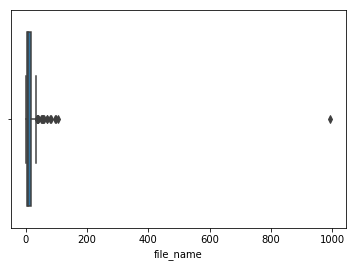

In [8]:
sns.boxplot(files_per_user)

In [9]:
files_per_user = dict(files_per_user.items())

In [10]:
df.shape

(4423, 4)

In [11]:
fun = lambda x: files_per_user[x] < 100
df = df[df.username.apply(fun)]

In [12]:
fun = lambda x: files_per_user[x] < 40
df[df.username.apply(fun)].count()

file_name    2365
full_path    2365
repo_name    2365
username     2365
dtype: int64

In [13]:
df.shape

(3323, 4)

Dwa najliczniejsze zbiory, zostały usunięte, ponieważ zawierały materiały z kursów, a nie tylko pracę użytkownika.

## Wizualizacja

### 1. Ile plików z analizami zawierają repozytoria?

In [14]:
def get_by_extension(df, ext):
    return df[df['file_name'].apply(lambda x: x.endswith(ext))]

In [15]:
group = get_by_extension(df, 'ipynb').groupby('username')['file_name']

In [16]:
group.count().mean(), group.count().median()

(8.759183673469387, 5.0)

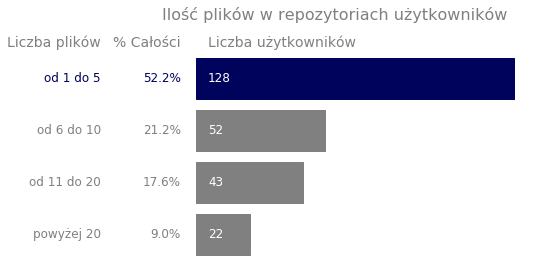

In [17]:
def hide_spines_and_ticks(ax):
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.yticks([])
    plt.xticks([])

def add_column(ax,colors,position,title,values,ha='right',values_positions=None):
    plt.text(position,-.6,title,ha=ha, color='grey',fontsize=14)
    for i,e in enumerate(values):
        pos = values_positions[i] if values_positions else position
        ax.text(pos,i,e,fontsize=12, 
                va='center',ha=ha,color=colors[i])
    
def set_colors(ax,colors,bars):
    for i in range(len(bars)):
        bars[i].set_color(colors[i])
    ax.tick_params(axis='x', colors='grey')
    
def bar_plot(data,colors):
    fig, ax = plt.subplots()
    bars = ax.barh(range(len(data)),data)
    ax.invert_yaxis()
    return fig, ax, bars

bins = [1,6,11,21,100]
colors = ['xkcd:dark blue']+['grey']*(len(bins)-1)
x,_ = np.histogram(group.count(),bins=bins)
_,ax,bars = bar_plot(x,colors)
set_colors(ax,colors,bars)

labels = ['od %s do %s'%(bins[i],bins[i+1]-1) for i in range(len(x)-1)]
labels.append('powyżej 20')

add_column(ax,colors,-38,'Liczba plików',labels)

percents = ['%.1f%%'% e for e in x/sum(x)*100]
add_column(ax,colors,-6,'% Całości',percents)

add_column(ax,['white']*len(x),5,'Liczba użytkowników',x,'left')

plt.title('Ilość plików w repozytoriach użytkowników',color='grey',size=16,x=-0.1,y=1.1,ha='left')
hide_spines_and_ticks(ax)

### 2. Co zawierają pliki README?

In [18]:
readme = []
for e in get_by_extension(df, 'md').full_path:
    i = 0
    tmp = []
    for t in open(e):
        if t.startswith('#'):
            tmp.append(t)
        i += 1
    readme.append((i, '\n'.join(tmp)))
sizes, texts = zip(*readme)

Text(-0.1,1.1,'Liczba linii w plikach README')

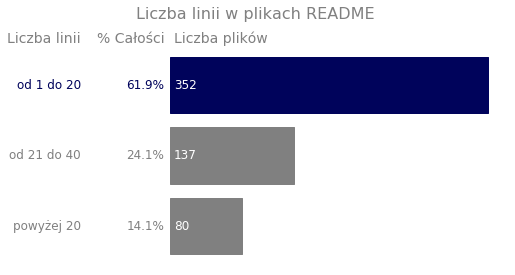

In [46]:
bins = [1,21,41,81]
colors = ['xkcd:dark blue']+['grey']*(len(sizes)-1)
x,_ = np.histogram(sizes,bins=bins)
_,ax,bars = bar_plot(x,colors)
set_colors(ax,colors,bars)
hide_spines_and_ticks(ax)
labels = ['od %s do %s'%(bins[i],bins[i+1]-1) for i in range(len(x)-1)]
labels.append('powyżej 20')

add_column(ax,colors,-98,'Liczba linii',labels)

percents = ['%.1f%%'% e for e in x/sum(x)*100]
add_column(ax,colors,-6,'% Całości',percents)

add_column(ax,['white']*len(x),5,'Liczba plików',x,'left')

plt.title('Liczba linii w plikach README',color='grey',size=16,x=-0.1,y=1.1,ha='left')

In [21]:
np.mean(sizes), np.median(sizes)

(45.77726574500768, 19.0)

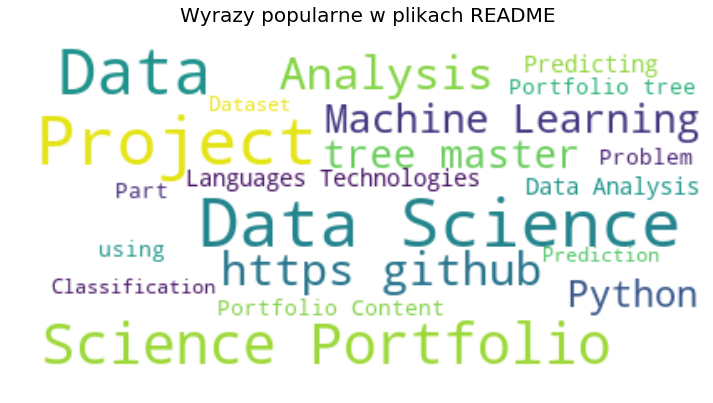

In [22]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS


def cloud(text, stopwords=[], max_words=20):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_font_size=40,
        random_state=43,
        max_words=max_words).generate(text)
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')


cloud('\n'.join(texts),STOPWORDS)
plt.title('Wyrazy popularne w plikach README',
          size=20,y=1.05);

Pliki README najczęściej zawierają tytuł oraz krótki opis, a także linki do notebooków.

### 3. Jakie są najpopularniejsze biblioteki, moduły, funkcje i klasy oraz czy istnieją między nimi powiązania?

In [23]:
import json

In [24]:
def get_notebook_text(path, cell_type):
    result = []
    try:
        j = json.loads(open(path).read())
        for e in j['cells']:
            if e['cell_type'] == cell_type:
                result.extend(e['source'])
    except Exception as ex:
        pass
    return result


notebooks_texts = []
for e in get_by_extension(df, 'ipynb').full_path:
    notebooks_texts.extend(get_notebook_text(e, 'markdown'))

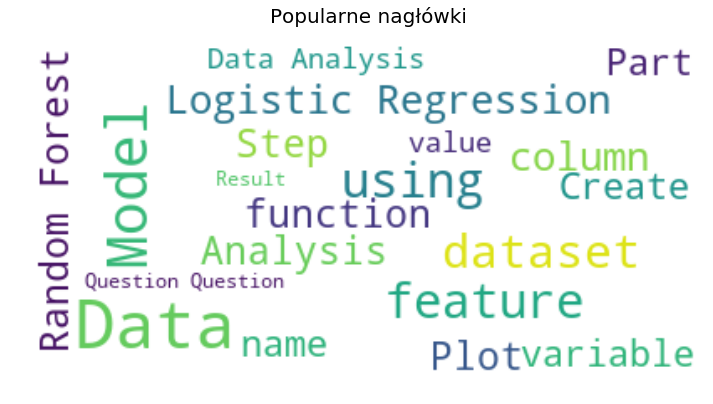

In [25]:
cloud('\n'.join([e for e in notebooks_texts if e.startswith('#')]),STOPWORDS)
plt.title('Popularne nagłówki',
          size=20,y=1.05);

In [26]:
def get_imports(df):
    l = []
    for _, e in get_by_extension(df, 'ipynb').iterrows():
        for line in get_notebook_text(e.full_path, 'code'):
            if line.startswith('import ') or \
            (line.startswith('from ') and 'import ' in line):
                l.append((e.file_name, line))
    return l

In [27]:
imports = get_imports(df)

In [28]:
def normalize_imports(l):
    result = []
    for file_name, line in l:
        try:
            i = line.index('import ')
            if i == 0:
                if ' as' in line:
                    t = (file_name,
                         line[len('import '):line.index(' as')].strip())
                    result.append(t)
                else:
                    t = (file_name, line.replace('import ', '').strip())
                    result.append(t)
            else:
                module = line[:i - 1].replace('from ', '')
                if ' as' in module:
                    module = module[:module.index(' as')]
                for f in line[i + len('import '):].split(','):
                    if ' as' in f:
                        f = f[:f.index(' as')]
                    t = (file_name, module + '.' + f.strip())
                    result.append(t)
        except Exception as err:
            print(err, len(result))
    return result


df_imports = pd.DataFrame(
    normalize_imports(imports), columns=['file', 'import'])
imp = df_imports['import'].values

In [31]:
from collections import Counter
Counter([e.count('.') for e in imp])

Counter({0: 6775, 1: 4021, 2: 8109, 3: 978, 4: 79, 5: 11, 6: 1, 7: 1, 9: 1})

In [32]:
def split_import(df, l=['library', 'module', 'element']):
    for i, e in enumerate(l):
        df[e] = df['import'].\
            apply(lambda x:x.split('.')[i] if x.count('.')>=i else None)
    return df


df_imports = split_import(df_imports)

In [33]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

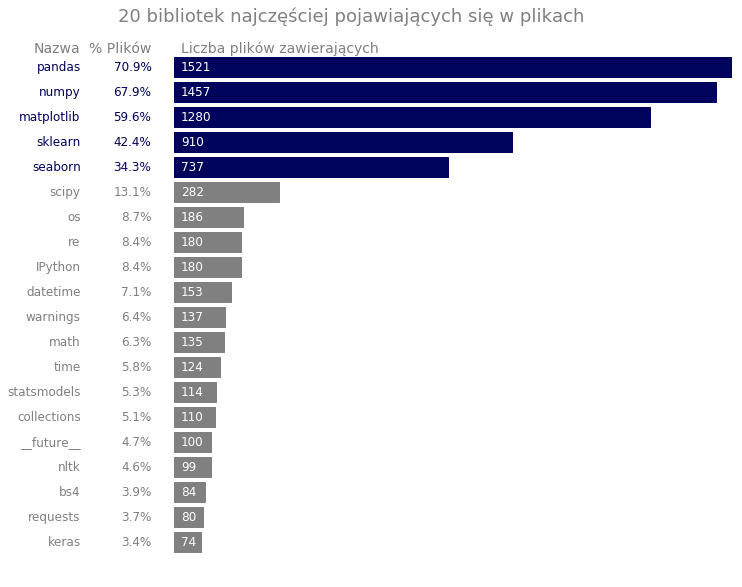

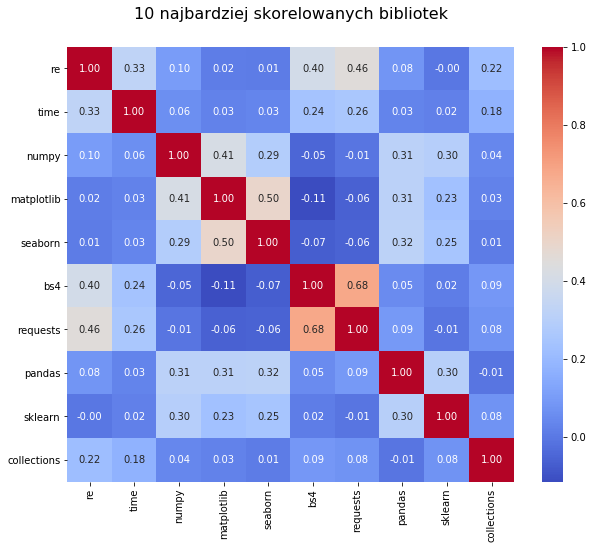

In [34]:
def get_top(df, level, top=20):
    tmp = df.groupby(level)['file'].nunique().sort_values(ascending=False)
    lib_names, lib_count = zip(*list(tmp.iteritems())[:top])
    return lib_names, lib_count


def get_df_level(df, level, lib_names, lib_count):
    df_level = pd.DataFrame()
    for name in lib_names:
        df_level[name] = df[level].str.contains(name)
        #df_libs[name] = df_libs[name].apply(lambda x:1 if x else 0)
    df_level['file'] = df.file
    df_level = df_level.groupby('file').sum()
    for name in lib_names:
        df_level[name] = df_level[name].apply(lambda x: 1 if x >= 1 else 0)
    return df_level


def plot_popularity(lib_count, lib_names, number_of_notebooks,
                    title, x_label, y_label):
    m = min(len(lib_count),5)
    colors = ['xkcd:dark blue']*m+['grey']*(len(lib_count)-m)
    fig,ax,bars = bar_plot(lib_count,colors)
    add_column(ax,colors,-250,'Nazwa',lib_names)
    set_colors(ax,colors,bars)
    hide_spines_and_ticks(ax)
    fig.set_size_inches(10,10)
    percents = np.array(lib_count)/number_of_notebooks*100
    percents = ['%.1f%%'% e for e in percents]
    add_column(ax,colors,-60,'% Plików',percents)
    add_column(ax,['white']*len(lib_count),20,'Liczba plików zawierających',lib_count,ha='left')
    plt.xlim(0,1500)
    plt.title(title,color='grey',size=18,x=-0.1,y=1.01,ha='left')


def plot_clusters(df, title,most_corelated):
    corr = df.corr().apply(lambda x:sum(x.apply(lambda e:abs(e)))).iteritems()
    c,_=zip(*sorted(corr,key=lambda x:x[1],reverse=True)[:most_corelated])
    plt.figure(figsize=(10,8))
    g = sns.heatmap(df[list(c)].corr(),cmap='coolwarm',annot=True,fmt='.2f')
    plt.title(title,size=16,y=1.05)
    return g

def plot_occurrences(df):
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['white','xkcd:dark blue'])
    plt.figure(figsize=(10, 10))
    g=sns.heatmap(df.sort_values(df.columns.values.tolist(),\
                                    ascending=False).transpose(),
                  cmap=cmap,cbar=False)
    g.set_xticks([])
    g.set_xlabel('')
    g.tick_params(axis='y', colors='grey')
    legend_TN = [
        mpatches.Patch(color=c, label=l,edgecolor='black')
        for c, l in [(cmap(0), 'bla'), (cmap(.99), 'o')]
    ]
    legend = g.legend(
        loc='center left',
        bbox_to_anchor=(1.01, 0.85),
        handles=legend_TN,
        frameon=True)
    legend.set_title(title='tissue type', prop={'size': 10})

def plot_clusters_and_popularity(df_imports,number_of_notebooks,level='library', top=20,most_corelated=10,
                                plot_occurr=False):
    d = {'library':'bibliotek','module':'modułów','element':'elementów'}
    lib_names, lib_count = get_top(df_imports, level, top)
    df_level = get_df_level(df_imports, level, lib_names, lib_count)
    plot_popularity(lib_count, lib_names, number_of_notebooks,'%d %s najczęściej pojawiających się w plikach' % (top, d[level]),
                    'Number of files containing module', 'module name')
    plot_clusters(df_level, '%d najbardziej skorelowanych %s' % (most_corelated, d[level]),\
                  most_corelated=10)
    if plot_occurr:
        plot_occurrences(df_level)

all_notebooks = sum(df['full_path'].apply(lambda x:x.endswith('.ipynb')))
plot_clusters_and_popularity(df_imports,all_notebooks,plot_occurr=False)

&nbsp;&nbsp;&nbsp;&nbsp;Bibliotekami występującymi w największej liczbie plików z analizami są:
		<br>
         &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;pandas- służąca do wczytywania oraz manipulacji danymi
        <br>
		 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;numpy- wydajna biblioteka umożliwiająca pracę z wielowymiarowymi tablicami
        <br>
		&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;matplotlib- wizualizacja danych
        <br>
		&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;sklearn- uczenie maszynowe oraz transformacja danych
        <br>
		&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;seaborn- wizualizacja danych
		<br>
&nbsp;&nbsp;&nbsp;&nbsp;Największa korelacja (0.68) występuje, pomiędzy biblioteką requests służącą do wysyłania zapytań HTTP np. w celu pobrania kodu HTML strony oraz bs4 wykorzystywaną do wyłuskania informacji z jej elementów np. tekstu opisującego linki. Wysoka zależność występuje, także pomiędzy requests a re. Biblioteka re służy do obsługi wyrażeń regularnych w Pythonie. Nieco niższy wynik uzyskuje requests z time. Jest ona często wykorzystywana do mierzenia czasu wykonania fragmentu kodu lub opóźnienia jego wykonania. Zastosowanie to przydaje się podczas wysyłania wielu zapytań do jednej strony, chroni wtedy przed jej nadmiernym przeciążeniem. Wszystkie powyższe biblioteki wykorzystywane są w web scrappingu, czyli do zautomatyzowanego pobierania treści stron.
	Wysoka korelacja występuje, pomiędzy bibliotekami do wizualizacji danych seaborn oraz matplotlib. Seaborn bazuje na matplotlib, która możliwa także bardziej zaawansowane dostosowanie wykresów.

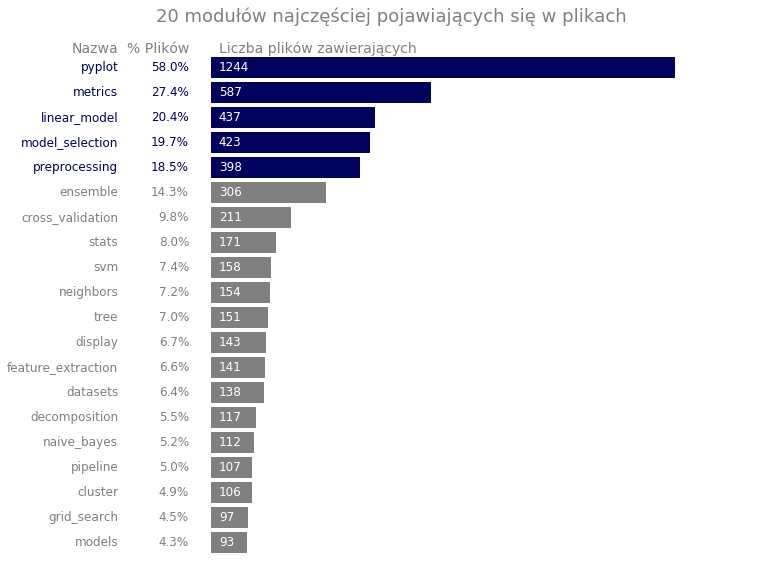

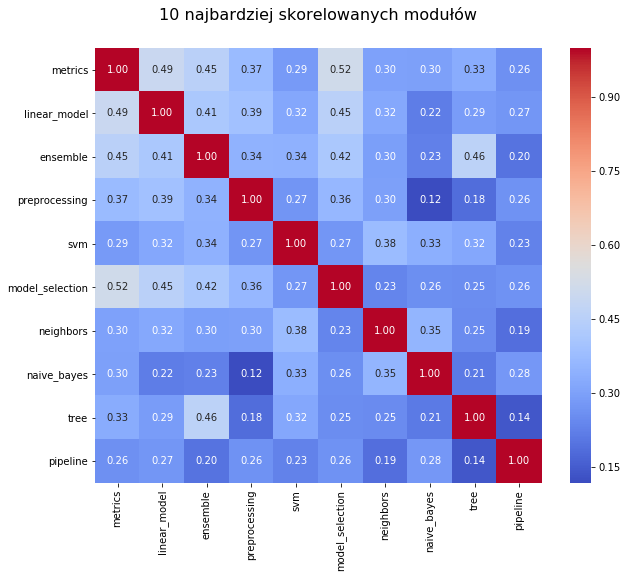

In [35]:
plot_clusters_and_popularity(df_imports,all_notebooks,'module')

&nbsp;&nbsp;&nbsp;&nbsp;Zastosowania najczęściej występujących modułów to wizualizacja danych (pyplot), ewaluacja modeli (metrics, model_selection), tworzenie modeli liniowych (linear_model) oraz transformacja danych na potrzeby modeli (preprocessing).
<br>
&nbsp;&nbsp;&nbsp;&nbsp;Najbardziej znacząca korelacja występuje, pomiędzy model_selection oraz metrics. Oba te moduły używane są podczas weryfikacji skuteczności modeli. 

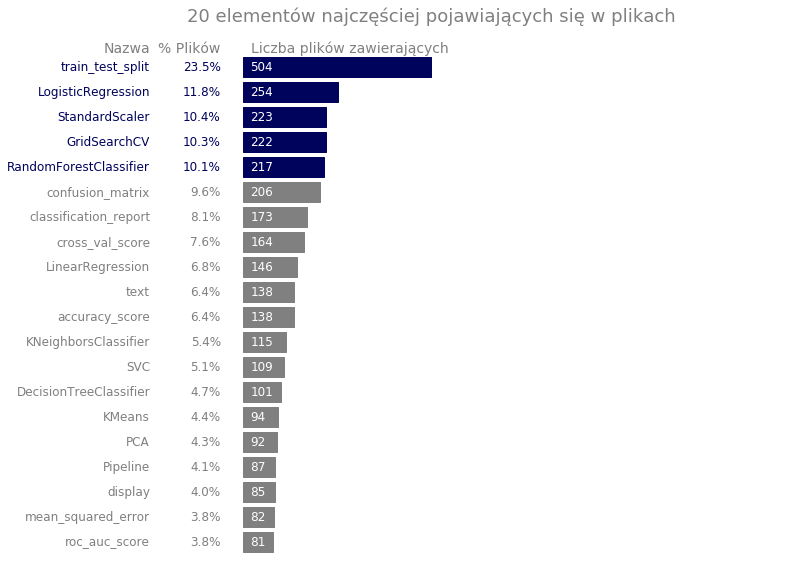

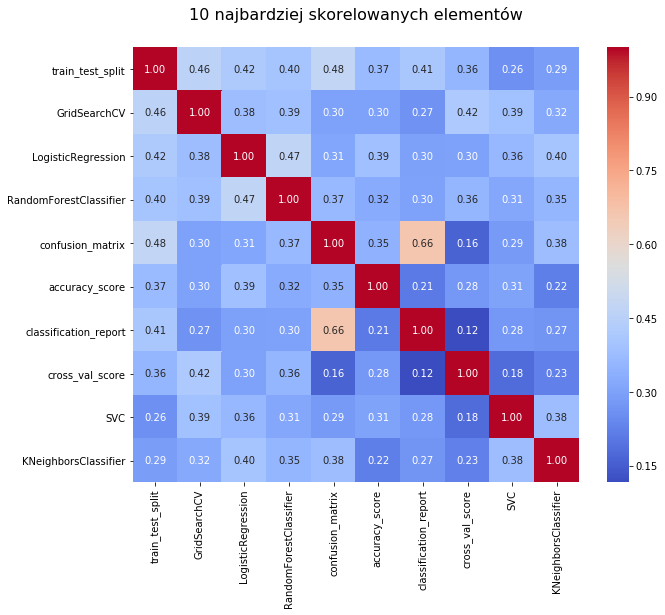

In [36]:
plot_clusters_and_popularity(df_imports,all_notebooks,'element')

&nbsp;&nbsp;&nbsp;&nbsp;Wśród najczęściej występujących funkcji oraz klas można wyróżnić:
* testowe (train_test_split, GridSearchCV)
* modele (LogisticRegression, RandomForestClassifier) 
* normalizację (StandardScaler) 

&nbsp;&nbsp;&nbsp;&nbsp;Największe powiązanie występuje, pomiędzy confiusion_matrix oraz classification_report służącymi do opisania wyników klasyfikacji. Również train_test_split wykazuje silną korelację z wcześniej wymienionymi. 

### 4. Jakie rozszerzenia plików są najczęściej używane?

In [37]:
import re
r = "[\"|\'](\\\\?[a-z0-9_])*\.[a-z0-9_]{2,5}[\"|\']"
pattern = re.compile(r, re.IGNORECASE)

In [38]:
from tqdm import tqdm
groups = []
for e in tqdm(get_by_extension(df, 'ipynb').full_path):
    codes = get_notebook_text(e, 'code')
    if codes:
        files = [
            pattern.search(e).group() for e in codes if e and pattern.search(e)
        ]
        groups.extend(set(files))

groups = [e.replace('"', '').replace("'", '') for e in groups]
groups_count = Counter([e.split('.')[-1] for e in groups]).items()
groups_sorted = sorted(groups_count, key=lambda x: x[1], reverse=True)[:10]
names, count = zip(*groups_sorted)

100%|██████████| 2146/2146 [00:08<00:00, 257.50it/s]


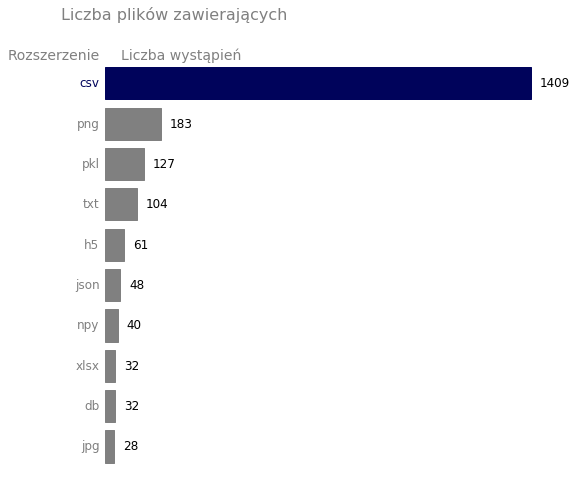

In [39]:
colors = ['xkcd:dark blue']+['grey']*(len(count)-1)
fig, ax, bars = bar_plot(count,colors)
set_colors(ax,colors,bars)
hide_spines_and_ticks(ax)
add_column(ax,colors,-20,'Rozszerzenie',names)
pos = [e+30 for e in count]
add_column(ax,['black']*len(count),50,'Liczba wystąpień',
           count,ha='left',values_positions=pos)
plt.title('Liczba plików zawierających',color='grey',
          size=16,x=-0.1,y=1.05,ha='left')
fig.set_size_inches(8,8)

### 5. Jakie są popularne tematy analiz?

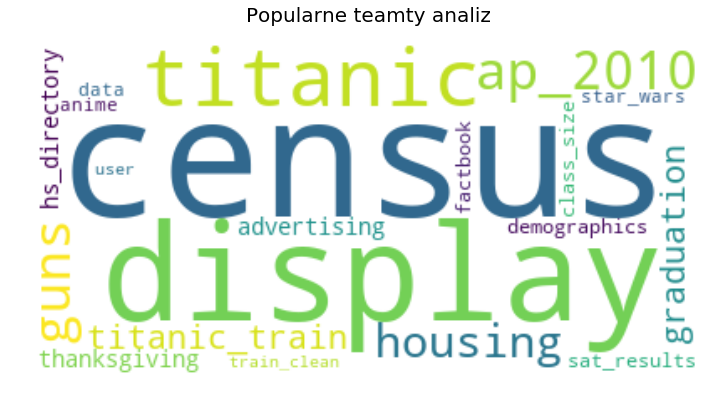

In [40]:
stopwords = ['train', 'test', 'submission', 'font', 'int']
wordCloud = WordCloud(background_color='white',max_words=20)
file_names = [e.split('.')[-2].lower().strip() for e in groups]
file_names = [e for e in file_names if e not in stopwords]
file_names = [e for e in file_names if len(e)>3 and len(e)<15]
wordCloud.generate_from_frequencies(Counter(file_names))
#cloud('\n'.join([e.split('.')[-2].lower().strip() for e in groups]),stopwords)
plt.figure(figsize=(12, 8))
plt.imshow(wordCloud, interpolation='bilinear')
plt.title('Popularne teamty analiz',
          size=20,y=1.05)
plt.axis("off")
plt.show()

## Wnioski

1. Większość portfolio zawiera od 1 do 5 plików.
2. Pliki README zawierają zwykle krótki opis.
3. Do najpopularniejszych bibliotek należą pandas, numpy, matplotlib, sklearn oraz seaborn. Spośród których do najczęściej występujących należą moduły, funkcje oraz klasy służące do wizualizacji, ewaluacji, preprocessingu, skalowania danych oraz tuningu modeli. Dużą popularnością cieszy się, także model liniowy. Istnieją zależności pomiędzy bibliotekami, modułami oraz elementami. Główne grupy powiązań odnoszą się do web scrappingu, ewaluacji oraz tuningu modeli.
5. Do najczęściej używanych plików podczas analiz należą źródła danych (csv, txt, json, xls, h5, db, npy), pliki obrazów (png, jpg) oraz pliki serializacji języka Python (pkl). 
6. Do popularnych tematów analiz należą dane demograficzne, ceny domów, Titanic, oceny oraz reklamy.